BEFORE HANDLING OUTLIERS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [24]:
x = np.loadtxt("./MLdata2.txt")
kmeansmodel = KMeans(n_clusters = 3, random_state = 1).fit(x)
labels = kmeansmodel.labels_
silhouette_score(x, labels, metric = 'euclidean')

0.9085596637047465

IQR FOR OUTLIERS

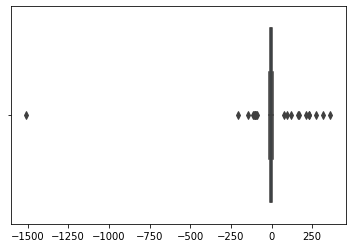

In [28]:
# x = np.loadtxt('./MLdata2.txt')
# arr = []
# for i in range (1,20): 
#     kmodel = KMeans (n_clusters =i)
#     kmodel.fit(x)
#     arr.append(kmodel.inertia_)

# plt.figure(figsize=(12,12))
# plt.plot(np.arange (1,20,1), arr)
# df=df.dropna()

# IQR :
df = pd.DataFrame (x, columns=['a', 'b', 'c','d'])
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR=Q3-Q1
df = df [(df > Q1-1.5*IQR) & (df<Q3+1.5*IQR)]
df=df.dropna()
df.isnull().sum()
numArr =df.values

# scorel1 = silhouette_score(numArr, kmodel.labels_, metric = 'euclidean')
arr=[]
for i in range (1,20):
    km = KMeans(n_clusters=i)
    km.fit(numArr)
    arr.append(km.inertia_) 
sns.boxplot(x)
# plt.plot(range (1,20), arr)
# score2 = silhouette_score(x,km.labels,metric='euclidean')


In [22]:
print("0.9435596634040105")

0.9435596634040105


In [27]:
#ROUGH
x = np.loadtxt("./MLdata2.txt")
x= pd.DataFrame(x)
Q1 = x.quantile(.25)
Q3 = x.quantile(.75)
Q1,Q3

(0   -5.239452
 1   -6.112325
 2   -9.244682
 3   -1.070680
 Name: 0.25, dtype: float64,
 0    5.122974
 1    7.138566
 2   -2.625240
 3    8.397766
 Name: 0.75, dtype: float64)

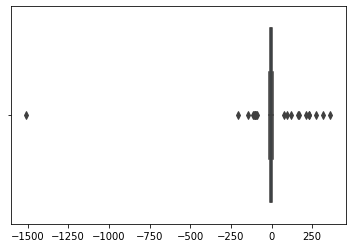

In [32]:
IQR=Q3-Q1
lowL=Q1-1.5*IQR
highL = Q3-1.5*IQR
x[(x<lowL)|(x>highL)]
sns.boxplot(x)

[[-12.82957745  -6.47896718]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -7.15914075]
 [-12.82957745  -6.77083916]
 [-12.82957745  -7.22916417]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.3193174 ]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745  -6.77083916]
 [-12.82957745

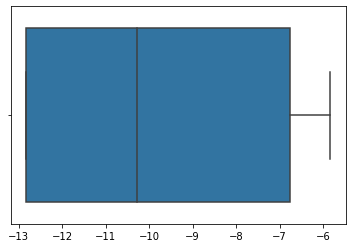

In [45]:
dfnew=x[(x>lowL)&(x<highL)]
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(dfnew)
dfnew = imputer.transform(dfnew)
print(dfnew)
# Xnew = dfnew.to_numpy()
sns.boxplot(dfnew)

In [46]:
kmeansmodel = KMeans(n_clusters = 3, random_state = 1).fit(dfnew)
labels = kmeansmodel.labels_
silhouette_score(dfnew, labels, metric = 'euclidean')

0.9049631564104943

In [21]:
# Q1 = np.percentile(x,25,interpolation='midpoint')
# Q3 = np.percentile(x,75,interpolation='midpoint')
# IQR=Q3-Q1
# print(IQR)
# lowL=Q1-1.5*IQR
# highL = Q3-1.5*IQR
# outlier=[]
# for i in x:
#     if((i>highL) or (i<lowL)):
#         outlier.append(i)
# plt.figure(figsize=(20,6))
# sns.boxplot(x)